In [16]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import Aer
from qiskit.circuit.library import QFT
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

import random
# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

qiskit_runtime_service.__init__:INFO:2024-04-20 12:56:10,431: Default instance: ibm-q/open/main


In [17]:
n = 2 # No of legal participants
m = 3 # length of the secret

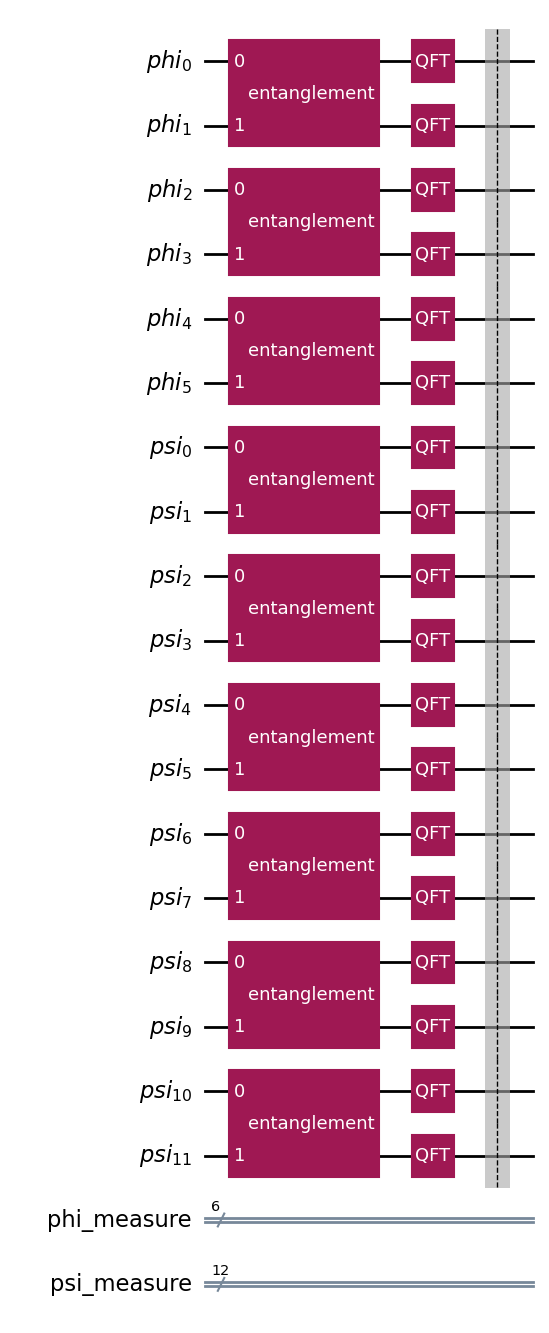

In [18]:
qc = QuantumCircuit(2, name='entanglement')
qft = QFT(1)
qft.draw()
qc.h(0)
qc.cx(0, 1)
qc.draw()
sub_gate = qc.to_instruction()
qr1 = QuantumRegister(2*m, 'phi')
qr2 = QuantumRegister(2*m*n, 'psi')

cr1 = ClassicalRegister(2*m, 'phi_measure')
cr2 = ClassicalRegister(2*m*n, 'psi_measure')

Cir = QuantumCircuit(qr1, qr2, cr1, cr2)
i = 0
while(i < 2*(m*n+m)-1):
    Cir.append(sub_gate, [i,i+1])
    Cir.append(qft, [i])
    Cir.append(qft, [i+1])
    i = i+2
Cir.barrier()
Cir.draw()

In [19]:
user = [None]*n
for i in range (0, n):
    user[i] = i

def create_seq(user):
    seq = []
    i = user
    while (i  < m*n):
        seq.append(qr1[i])
        i = i + n
        # break
    return seq

result = map(create_seq, user)
# print(list(result))
indexed_values = enumerate(result)
result_dict = dict(indexed_values)
# print(result_dict)

for key in result:
    print(key)
# print(type(result))
# print(list(result)) 
j = 0
for key in result_dict:
    end = (key+1)*m*n
    while j < end:
        result_dict[key].append(qr2[j+1])
        # i = current_m + n
        j = j + n
        # print(i)
        # break
    # print(i)
    # current_m = i 
print(result_dict)

{0: [Qubit(QuantumRegister(6, 'phi'), 0), Qubit(QuantumRegister(6, 'phi'), 2), Qubit(QuantumRegister(6, 'phi'), 4), Qubit(QuantumRegister(12, 'psi'), 1), Qubit(QuantumRegister(12, 'psi'), 3), Qubit(QuantumRegister(12, 'psi'), 5)], 1: [Qubit(QuantumRegister(6, 'phi'), 1), Qubit(QuantumRegister(6, 'phi'), 3), Qubit(QuantumRegister(6, 'phi'), 5), Qubit(QuantumRegister(12, 'psi'), 7), Qubit(QuantumRegister(12, 'psi'), 9), Qubit(QuantumRegister(12, 'psi'), 11)]}


Qubit(QuantumRegister(12, 'psi'), 1) 1
Qubit(QuantumRegister(12, 'psi'), 3) 3
Qubit(QuantumRegister(12, 'psi'), 5) 5
Qubit(QuantumRegister(12, 'psi'), 7) 7
Qubit(QuantumRegister(12, 'psi'), 9) 9
Qubit(QuantumRegister(12, 'psi'), 11) 11


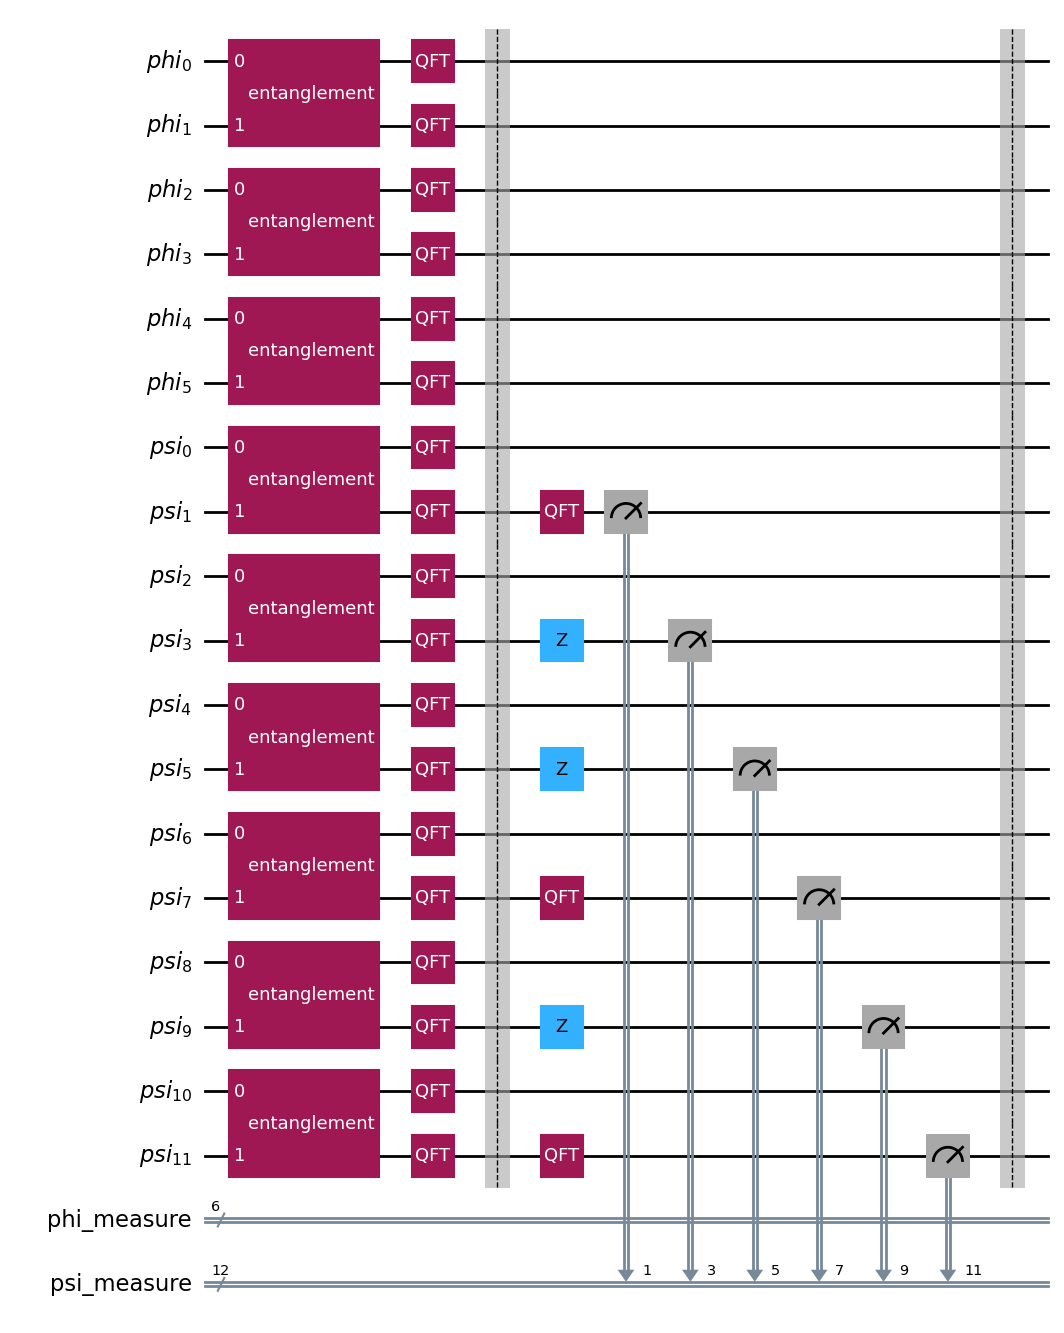

In [20]:
V2 = QFT(1)
bases = []
for keys in result_dict:
    for qubit in result_dict[keys]:
        name2 = str(qubit)
        name = name2.split(",")
        name[2] = name[2].replace(')', '')
        if 'psi' in name2:
            # print("here")
            index = int(name[2])
            print(name2, index)
            num = random.choice([0, 1])
            bases.append(num)
            if(num == 0):
                Cir.z(qubit)
            else:
                Cir.append(V2, [m*n+index])
            Cir.measure(qubit, cr2[index])
            
Cir.barrier()        # break
Cir.draw()


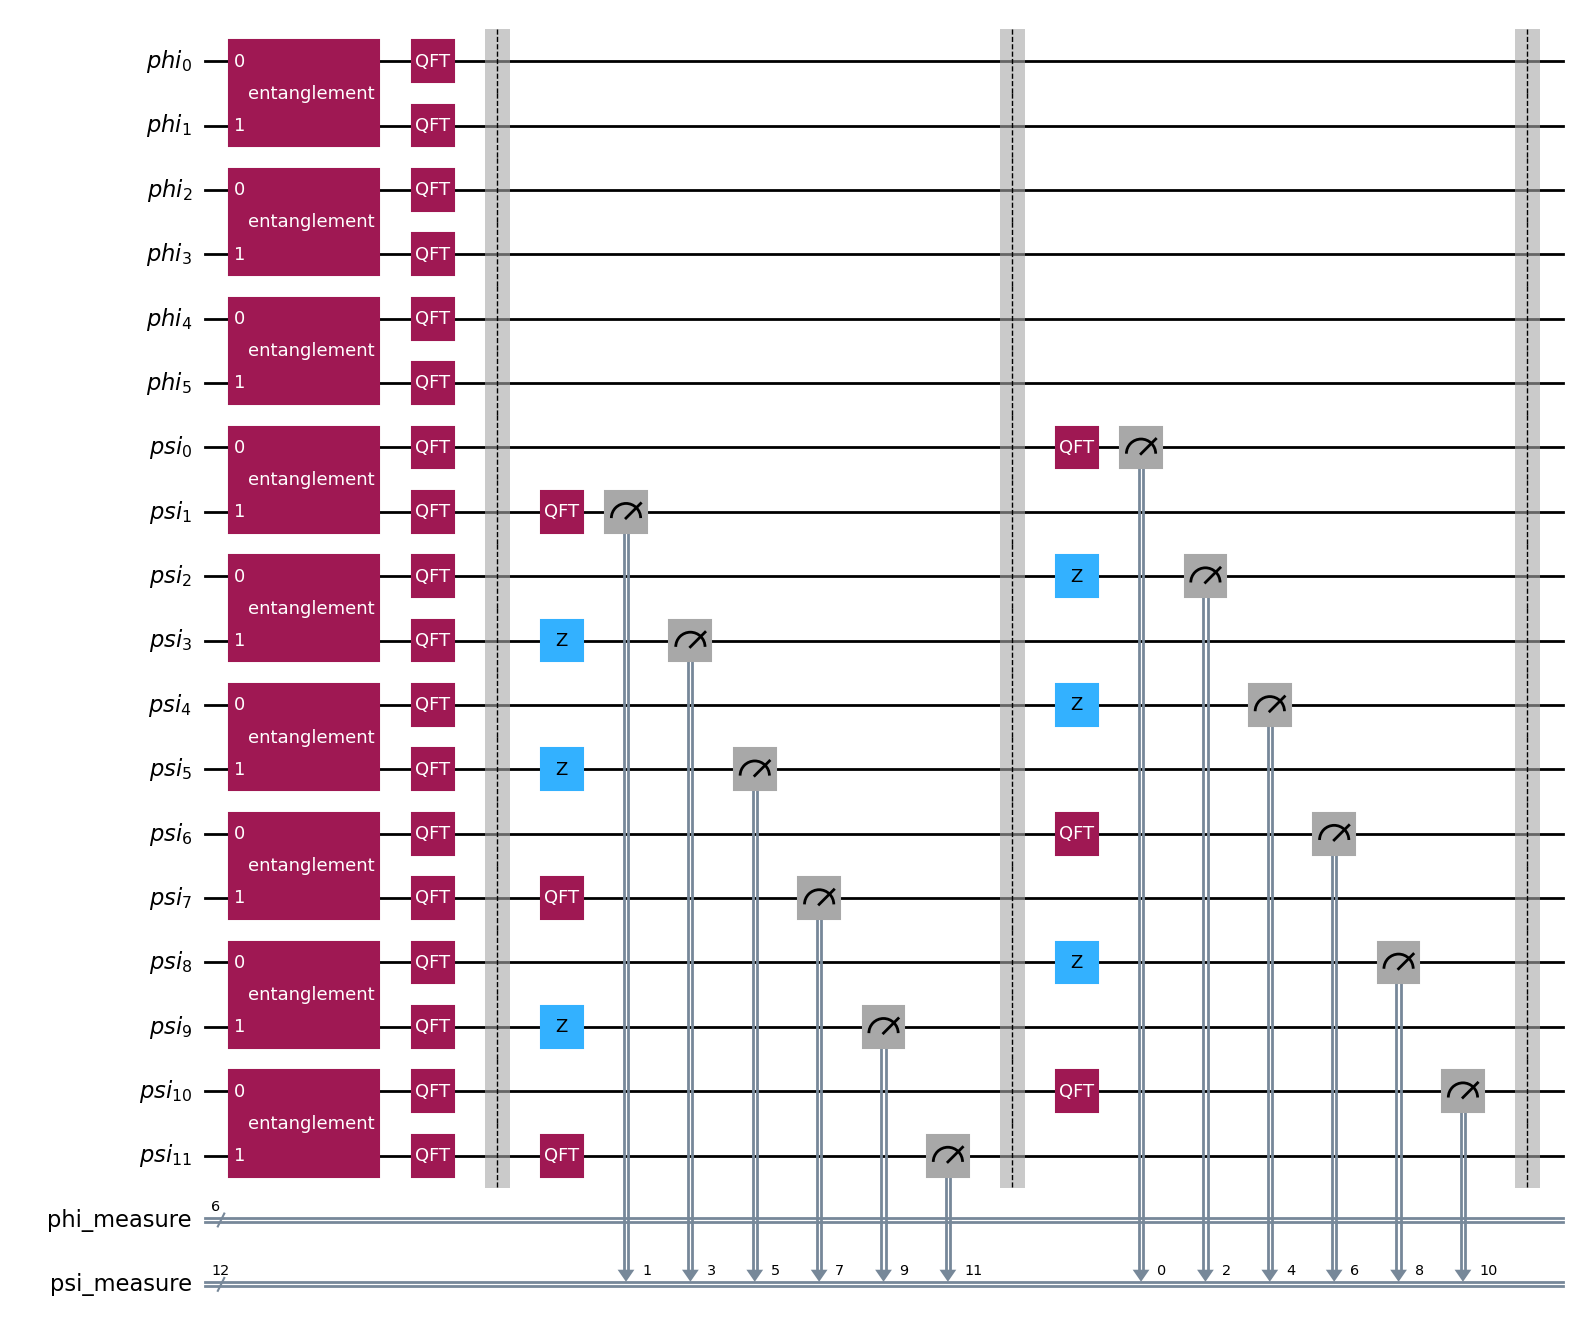

In [21]:

# what tp does 
# print(qr2[0])
start = m*n
for base in bases:
    if(base == 0):
        Cir.z(start)
    else:
        Cir.append(V2, [start])
    Cir.measure(qr2[start - m*n], cr2[start - m*n])
    start = start + 2
    # break
Cir.barrier()
Cir.draw()



Qubit(QuantumRegister(6, 'phi'), 0) 0
Qubit(QuantumRegister(6, 'phi'), 2) 2
Qubit(QuantumRegister(6, 'phi'), 4) 4
Qubit(QuantumRegister(6, 'phi'), 1) 1
Qubit(QuantumRegister(6, 'phi'), 3) 3
Qubit(QuantumRegister(6, 'phi'), 5) 5


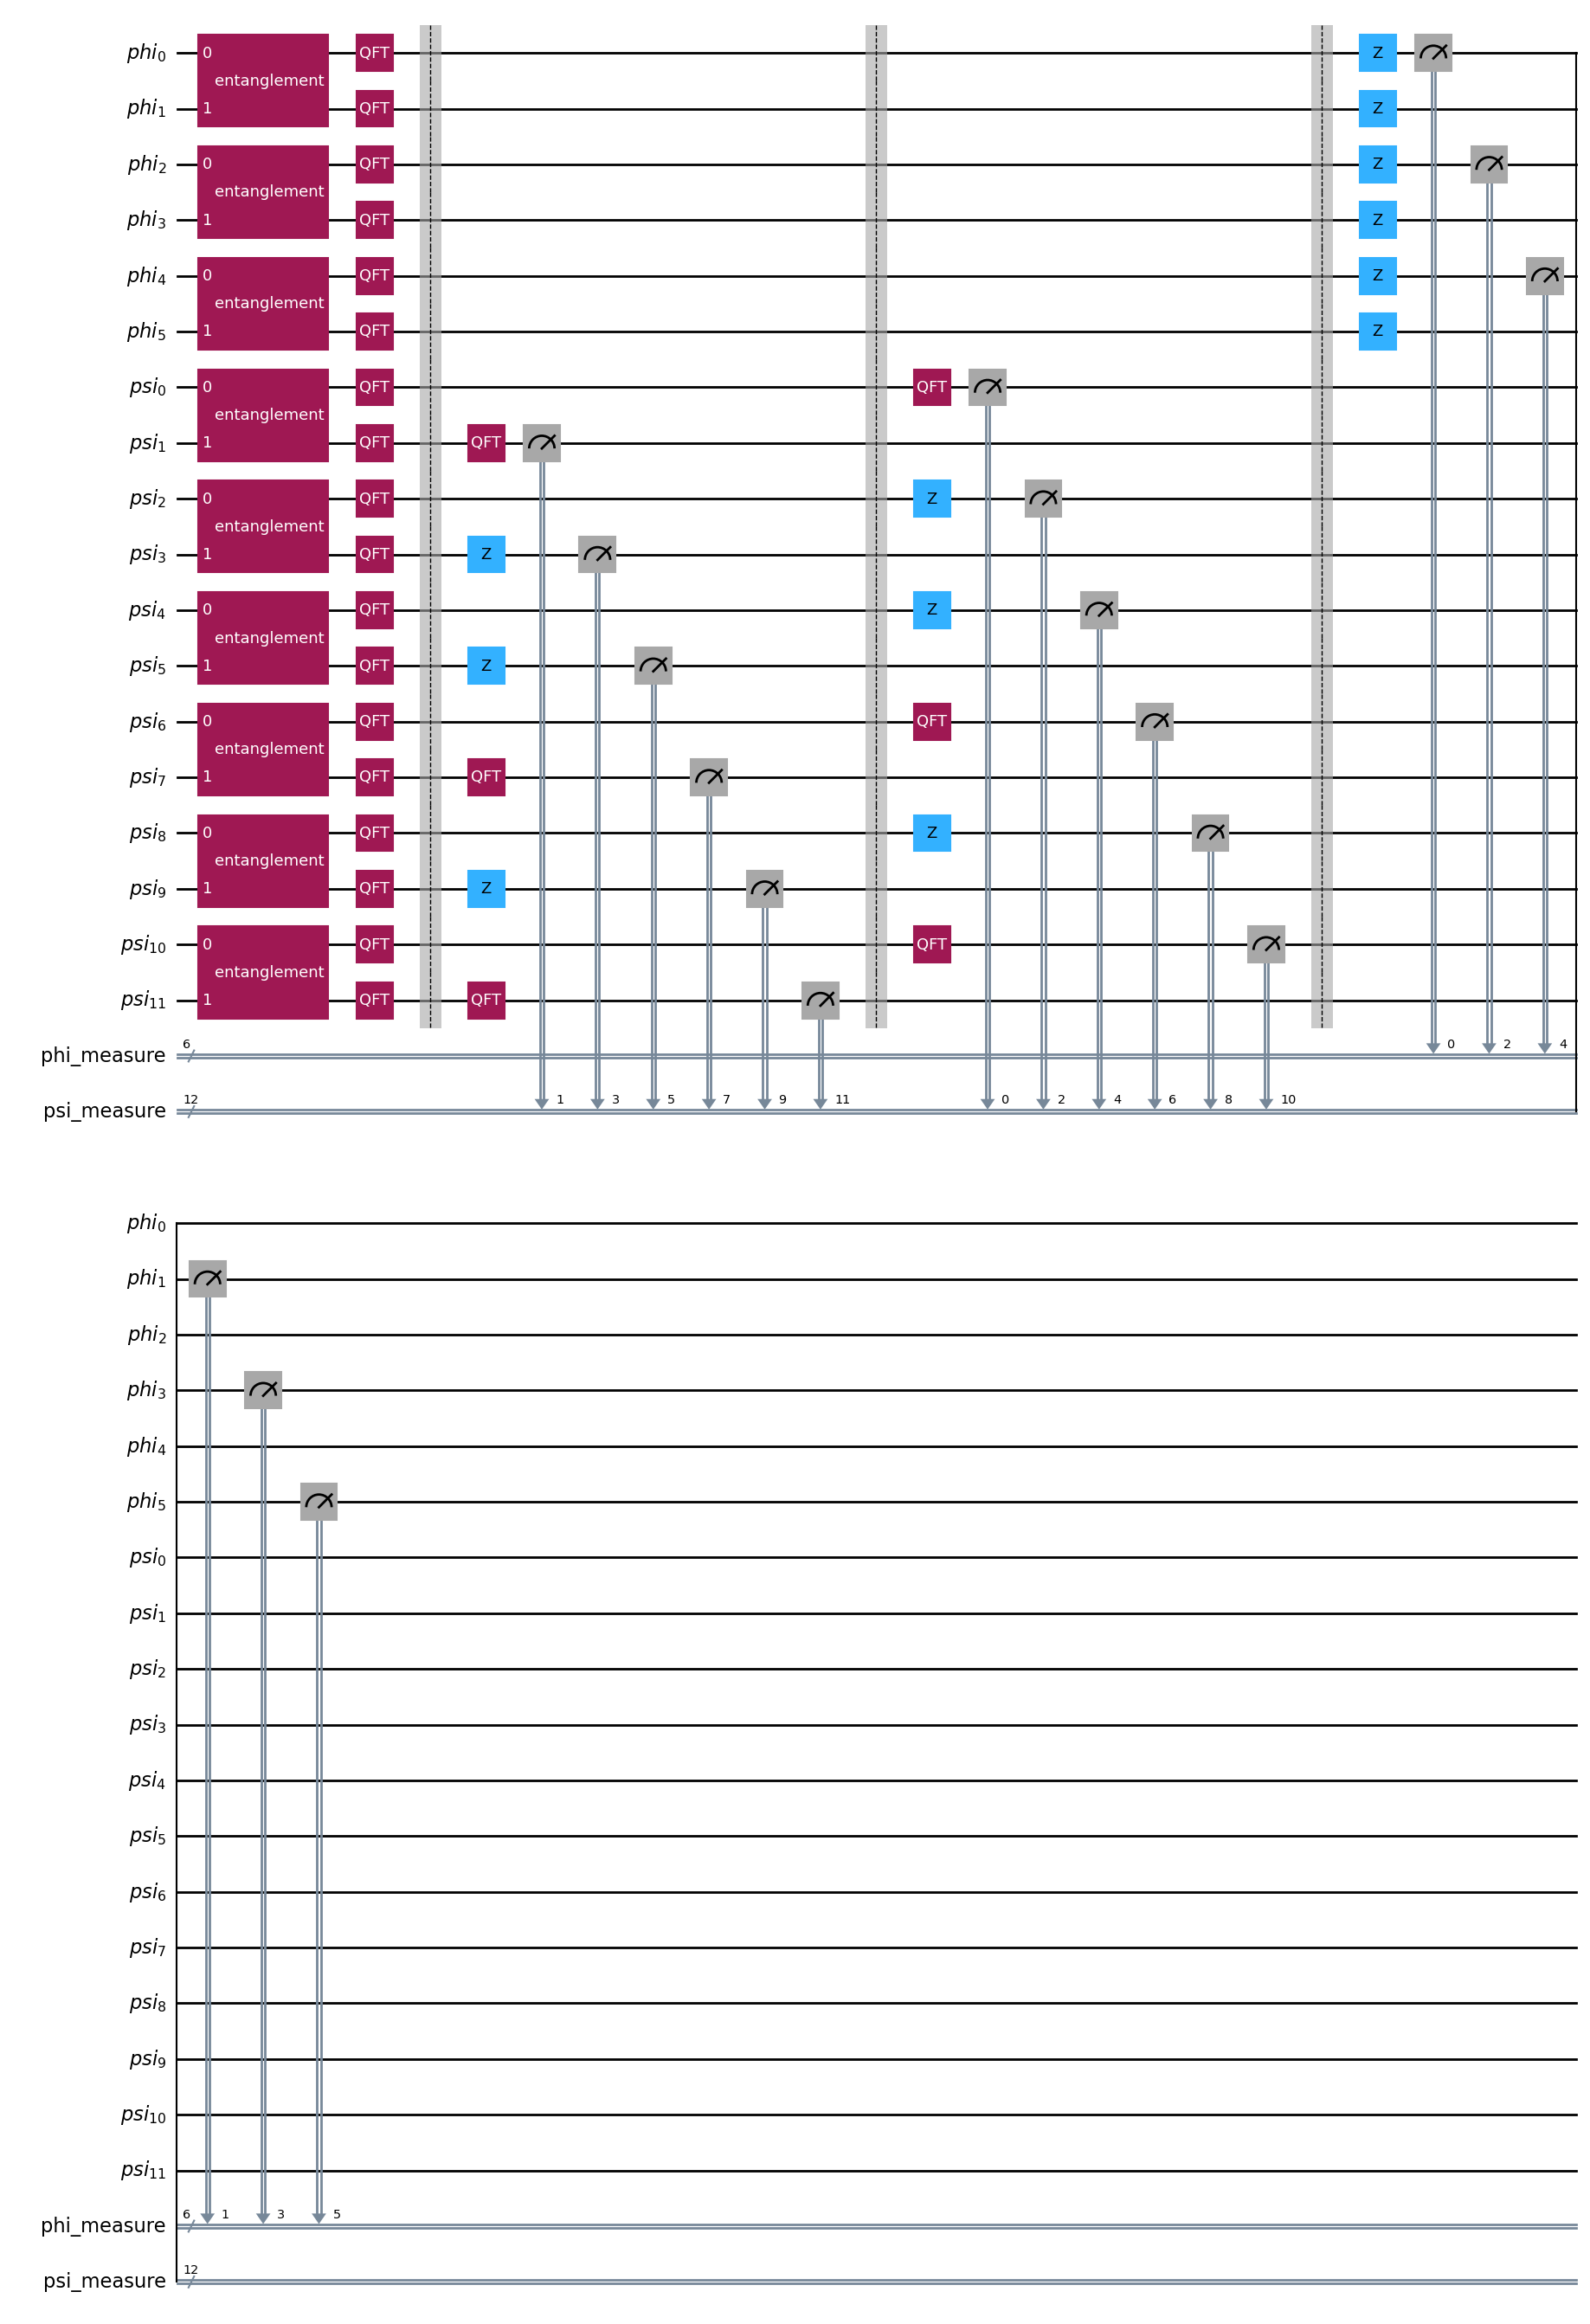

In [22]:
for keys in result_dict:
    for qubit in result_dict[keys]:
        name2 = str(qubit)
        name = name2.split(",")
        name[2] = name[2].replace(')', '')
        if 'phi' in name2:
            # print("here")
            index = int(name[2])
            print(name2, index)
            Cir.z(qubit)
            Cir.measure(qubit, cr1[index])
Cir.draw()

In [23]:
# transpiled_circuit = transpile(Cir, memory=True)
simulator = Aer.get_backend('qasm_simulator')
res = transpile(Cir,simulator)
result = simulator.run(res).result()
# memory = result.get_memory(Cir)
counts = result.get_counts()
# print(counts)
final = ""
for keys in counts:
    final = keys
    break

print(final)
final = final[::-1]
final = final.replace(" ", "")
print((final))

print((final[7], final[9], final[11], final[13], final[15], final[17]))
print((final[6], final[8], final[10], final[12], final[14], final[16]))

000011111111 111100
001111111111110000
('1', '1', '1', '1', '0', '0')
('1', '1', '1', '1', '0', '0')


In [24]:
def initialize_2d_list(w, h, val = None):
  return [[val for x in range(w)] for y in range(h)]
result_party = initialize_2d_list(m,2,0)
# print(result[1][0])
# initialize_2d_list(2, 2, 0) # [[0, 0], [0, 0]]

for keys in result_dict:
    j=0
    for qubit in result_dict[keys]:
        name2 = str(qubit)
        name = name2.split(",")
        name[2] = name[2].replace(')', '')
        if 'psi' in name2:
            # print("here")
            index = int(name[2])
            # print(name2, index)
            # print((keys))
            result_party[keys][j] = final[m*n+index]
            j = j+1

print(result_party)

[['1', '1', '1'], ['1', '0', '0']]


In [25]:
tp = initialize_2d_list(m,2,0)

for keys in result_dict:
    j=0
    for qubit in result_dict[keys]:
        name2 = str(qubit)
        name = name2.split(",")
        name[2] = name[2].replace(')', '')
        if 'psi' in name2:
            # print("here")
            index = int(name[2])
            # print(name2, index)
            # print((keys))
            tp[keys][j] = final[m*n+index-1]
            j = j+1

print(tp)

for i in range(len(tp)):
    for j in range(len(tp[i])):
        value = int(tp[i][j])
        updated_value = (n - value) % n
        # Update the element in the list with the updated value
        tp[i][j] = str(updated_value)

print(tp)

[['1', '1', '1'], ['1', '0', '0']]
[['1', '1', '1'], ['1', '0', '0']]


In [26]:
key = initialize_2d_list(m,2,0)
j = 0
print(bases)
for row in range(0, len(key)):
    for index in range(0, len(key[row])):
        if(bases[j] == 0):
            key[row][index] = tp[row][index]
        else:
            key[row][index] = result_party[row][index]
        j = j+1
print(key)

[1, 0, 0, 1, 0, 1]
[['1', '1', '1'], ['1', '0', '0']]


In [27]:
rj = initialize_2d_list(m,2,0)
j = 0
for keys in result_dict:
    j=0
    for qubit in result_dict[keys]:
        name2 = str(qubit)
        name = name2.split(",")
        name[2] = name[2].replace(')', '')
        if 'phi' in name2:
            # print("here")
            index = int(name[2])
            # print(name2, index)
            # print((keys))
            rj[keys][j] = final[index]
            j = j+1

print(final[0],final[2],final[4])
print(final[1],final[3],final[5])
print(rj)

0 1 1
0 1 1
[['0', '1', '1'], ['0', '1', '1']]


In [28]:
secret = initialize_2d_list(m,2,0)
secret[0][1]  = secret[1][1] = 1
secret[0][2]  = secret[1][2] = 1
print(secret)

[[0, 1, 1], [0, 1, 1]]


In [29]:
c = initialize_2d_list(m,2,0)
for i in range(len(c)):
    for v in range(len(c[i])):
        # Convert each element to an integer and perform the calculation
        x_val = int(secret[i][v])
        y_val = int(key[i][v])
        r_val = int(rj[i][v])
        c[i][v] = str((x_val + y_val + r_val) % n)
print(c)

[['1', '1', '1'], ['1', '0', '0']]


In [30]:
d = [None]*m
for i in range(len(d)):
    d[i] = (int(c[0][i]) + int(c[1][i]) + (n - int(key[0][i])) + (n - int(key[1][i])))%n

print(d)


[0, 0, 0]
